In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_Modbus.csv")
df.head()

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type
0,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
1,1556208840,25-Apr-19,09:14:00,49389,52921,25770,13625,1,injection
2,1556208841,25-Apr-19,09:14:01,49389,52921,25770,13625,1,injection
3,1556208842,25-Apr-19,09:14:02,49389,52921,25770,13625,1,injection
4,1556208844,25-Apr-19,09:14:04,40665,44748,21098,35371,1,injection


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)


True
               ts       date        time  FC1_Read_Input_Register  \
1      1556208840  25-Apr-19   09:14:00                     49389   
9      1556208850  25-Apr-19   09:14:10                     57147   
19     1556208860  25-Apr-19   09:14:20                     16992   
24     1556208865  25-Apr-19   09:14:25                     57110   
29     1556208870  25-Apr-19   09:14:30                      5523   
...           ...        ...         ...                      ...   
42647  1554202943   2-Apr-19     4:02:23                    46650   
42648  1554202943   2-Apr-19     4:02:23                    46650   
42650  1554202943   2-Apr-19     4:02:23                    53773   
42651  1554202943   2-Apr-19     4:02:23                    53773   
42652  1554202943   2-Apr-19     4:02:23                    53773   

       FC2_Read_Discrete_Value  FC3_Read_Holding_Register  FC4_Read_Coil  \
1                        52921                      25770          13625   
9             

In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time  FC1_Read_Input_Register  \
0      1556208840 2019-04-25   09:14:00                     49389   
2      1556208841 2019-04-25   09:14:01                     49389   
3      1556208842 2019-04-25   09:14:02                     49389   
4      1556208844 2019-04-25   09:14:04                     40665   
5      1556208846 2019-04-25   09:14:06                     40665   
...           ...        ...         ...                      ...   
51101  1554183533 2019-04-01   22:38:53                     62602   
51102  1554183536 2019-04-01   22:38:56                     62602   
51103  1554183537 2019-04-01   22:38:57                       198   
51104  1554183538 2019-04-01   22:38:58                       198   
51105  1554183541 2019-04-01   22:39:01                       198   

       FC2_Read_Discrete_Value  FC3_Read_Holding_Register  FC4_Read_Coil  \
0                        52921                      25770          13625   
2                  

In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:
df.month.unique()

array([4, 3])

In [ ]:
df.hour.unique()

array([ 9, 10, 11, 12,  6,  7,  8, 13, 14, 15, 23, 18, 19, 20, 21, 22,  5,
        4, 16, 17])

In [ ]:
import numpy as np
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/12))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/12))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
df

,ts,date,time,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556208840,2019-04-25,09:14:00,49389,52921,25770,13625,1,injection,2019,4,Thursday,9,14,00,-0.866025,-5.000000e-01,1.0,6.123234e-17
2,1556208841,2019-04-25,09:14:01,49389,52921,25770,13625,1,injection,2019,4,Thursday,9,14,01,-0.866025,-5.000000e-01,1.0,6.123234e-17
3,1556208842,2019-04-25,09:14:02,49389,52921,25770,13625,1,injection,2019,4,Thursday,9,14,02,-0.866025,-5.000000e-01,1.0,6.123234e-17
4,1556208844,2019-04-25,09:14:04,40665,44748,21098,35371,1,injection,2019,4,Thursday,9,14,04,-0.866025,-5.000000e-01,1.0,6.123234e-17
5,1556208846,2019-04-25,09:14:06,40665,44748,21098,35371,1,injection,2019,4,Thursday,9,14,06,-0.866025,-5.000000e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1554183533,2019-04-01,22:38:53,62602,1253,12772,29319,0,normal,2019,4,Monday,22,38,53,-1.000000,-4.286264e-16,1.0,6.123234e-17
51102,1554183536,2019-04-01,22:38:56,62602,1253,12772,29319,0,normal,2019,4,Monday,22,38,56,-1.000000,-4.286264e-16,1.0,6.123234e-17
51103,1554183537,2019-04-01,22:38:57,198,38266,33649,44594,0,normal,2019,4,Monday,22,38,57,-1.000000,-4.286264e-16,1.0,6.123234e-17
51104,1554183538,2019-04-01,22:38:58,198,38266,33649,44594,0,normal,2019,4,Monday,22,38,58,-1.000000,-4.286264e-16,1.0,6.123234e-17


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

                           count  percentage
ts                             0         0.0
date                           0         0.0
time                           0         0.0
FC1_Read_Input_Register        0         0.0
FC2_Read_Discrete_Value        0         0.0
FC3_Read_Holding_Register      0         0.0
FC4_Read_Coil                  0         0.0
label                          0         0.0
type                           0         0.0
year                           0         0.0
month                          0         0.0
day_name                       0         0.0
hour                           0         0.0
min                            0         0.0
sec                            0         0.0
hour_sin                       0         0.0
hour_cos                       0         0.0
month_sin                      0         0.0
month_cos                      0         0.0


In [ ]:
# drop columns 
df = df.drop(['ts', 'time','type','date','min','sec'], axis=1)

In [ ]:
df

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,49389,52921,25770,13625,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
2,49389,52921,25770,13625,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
3,49389,52921,25770,13625,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
4,40665,44748,21098,35371,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
5,40665,44748,21098,35371,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,62602,1253,12772,29319,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51102,62602,1253,12772,29319,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51103,198,38266,33649,44594,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51104,198,38266,33649,44594,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17


In [ ]:
# transform hour to int
df['hour'] = df['hour'].astype(int)

In [ ]:
type('hour')

str

In [ ]:
# transform int to string
df['label'] = df['label'].astype(str)

In [ ]:
#df['thermostat_status'] = df['thermostat_status'].astype(str)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'year',
 'month',
 'hour',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
cat_list

['day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

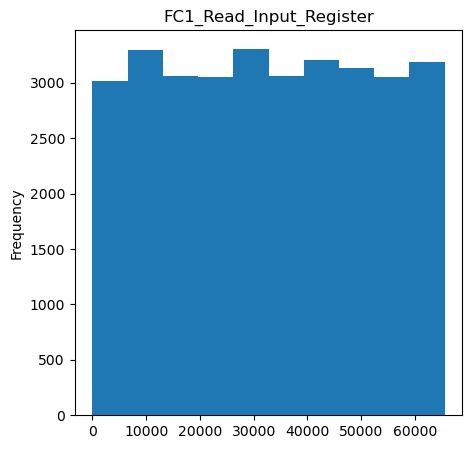

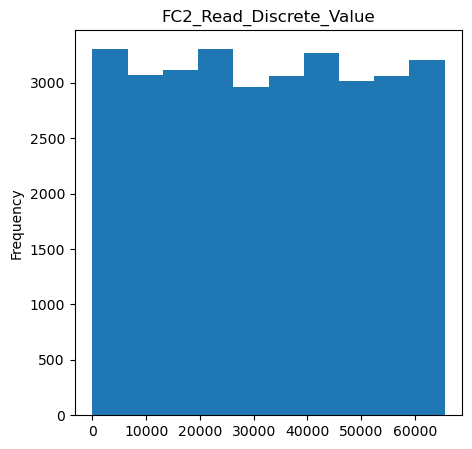

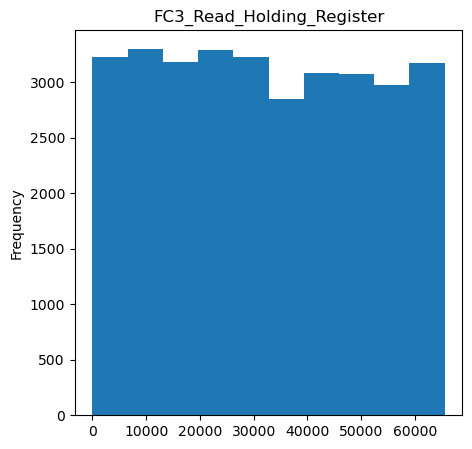

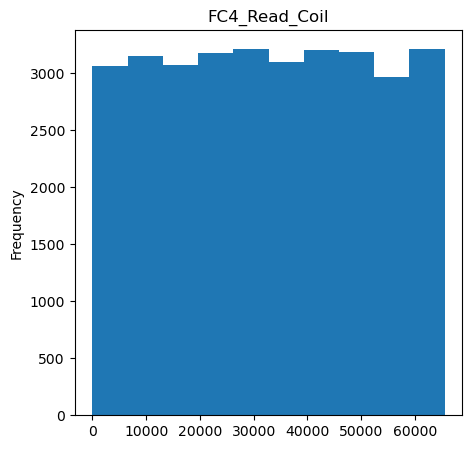

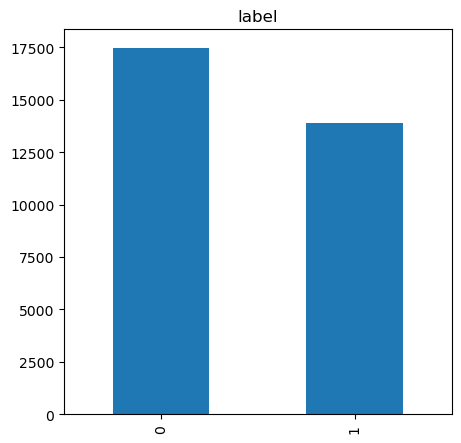

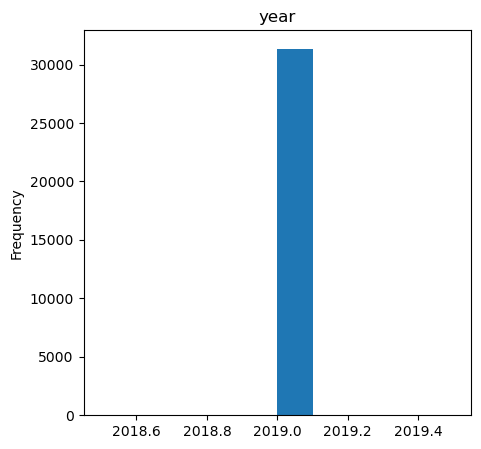

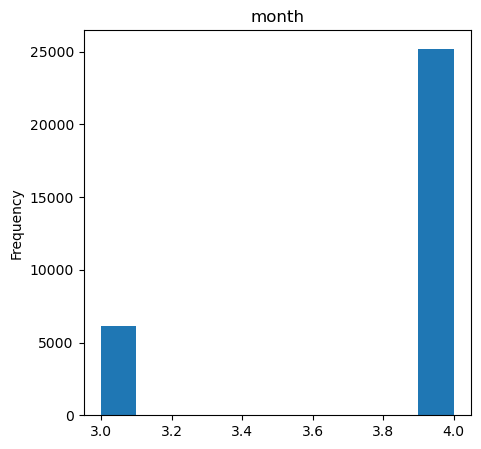

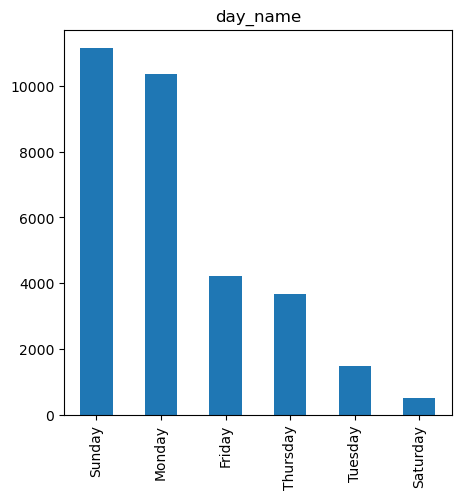

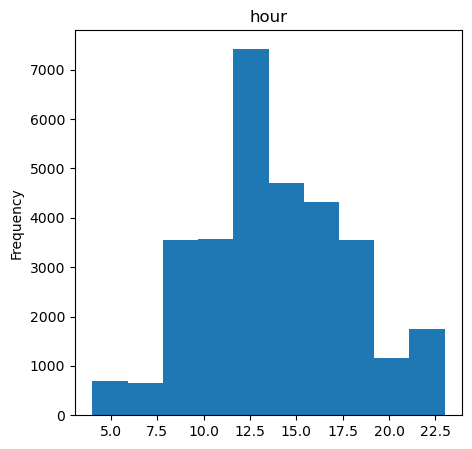

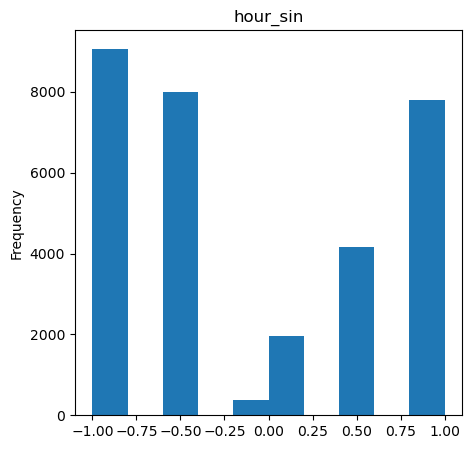

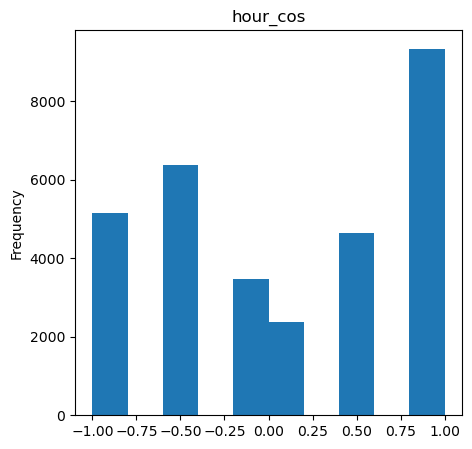

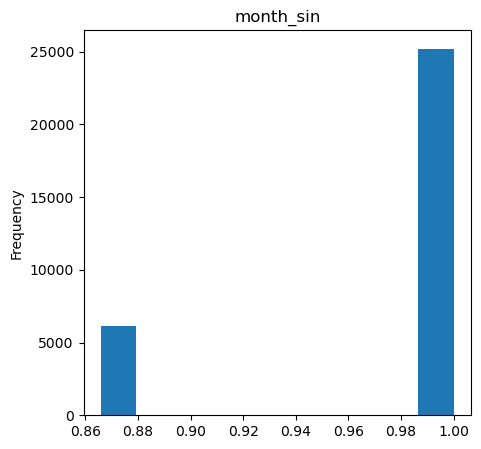

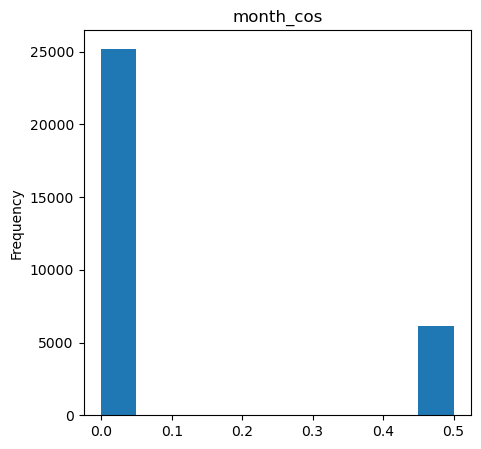

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,label,year,month,day_name,hour,hour_sin,hour_cos,month_sin,month_cos
0,49389,52921,25770,13625,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
2,49389,52921,25770,13625,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
3,49389,52921,25770,13625,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
4,40665,44748,21098,35371,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
5,40665,44748,21098,35371,1,2019,4,Thursday,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,62602,1253,12772,29319,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51102,62602,1253,12772,29319,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51103,198,38266,33649,44594,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51104,198,38266,33649,44594,0,2019,4,Monday,22,-1.000000,-4.286264e-16,1.0,6.123234e-17


In [ ]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
import category_encoders as ce

encoder= ce.BinaryEncoder(cols=['day_name','FC2_Read_Discrete_Value','FC1_Read_Input_Register','FC3_Read_Holding_Register','FC4_Read_Coil' ],return_df=True)


In [ ]:
df=encoder.fit_transform(df) 
df

,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,FC1_Read_Input_Register_3,FC1_Read_Input_Register_4,FC1_Read_Input_Register_5,FC1_Read_Input_Register_6,FC1_Read_Input_Register_7,FC1_Read_Input_Register_8,FC1_Read_Input_Register_9,...,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
2,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
3,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
4,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
5,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51102,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51103,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51104,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17


In [ ]:
df

,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,FC1_Read_Input_Register_3,FC1_Read_Input_Register_4,FC1_Read_Input_Register_5,FC1_Read_Input_Register_6,FC1_Read_Input_Register_7,FC1_Read_Input_Register_8,FC1_Read_Input_Register_9,...,year,month,day_name_0,day_name_1,day_name_2,hour,hour_sin,hour_cos,month_sin,month_cos
0,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
2,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
3,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
4,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
5,0,0,0,0,0,0,0,0,0,0,...,2019,4,0,0,1,9,-0.866025,-5.000000e-01,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51102,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51103,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17
51104,1,1,0,0,0,0,1,0,1,1,...,2019,4,1,1,0,22,-1.000000,-4.286264e-16,1.0,6.123234e-17


In [ ]:
list(df.columns)

['FC1_Read_Input_Register_0',
 'FC1_Read_Input_Register_1',
 'FC1_Read_Input_Register_2',
 'FC1_Read_Input_Register_3',
 'FC1_Read_Input_Register_4',
 'FC1_Read_Input_Register_5',
 'FC1_Read_Input_Register_6',
 'FC1_Read_Input_Register_7',
 'FC1_Read_Input_Register_8',
 'FC1_Read_Input_Register_9',
 'FC1_Read_Input_Register_10',
 'FC1_Read_Input_Register_11',
 'FC1_Read_Input_Register_12',
 'FC1_Read_Input_Register_13',
 'FC2_Read_Discrete_Value_0',
 'FC2_Read_Discrete_Value_1',
 'FC2_Read_Discrete_Value_2',
 'FC2_Read_Discrete_Value_3',
 'FC2_Read_Discrete_Value_4',
 'FC2_Read_Discrete_Value_5',
 'FC2_Read_Discrete_Value_6',
 'FC2_Read_Discrete_Value_7',
 'FC2_Read_Discrete_Value_8',
 'FC2_Read_Discrete_Value_9',
 'FC2_Read_Discrete_Value_10',
 'FC2_Read_Discrete_Value_11',
 'FC2_Read_Discrete_Value_12',
 'FC2_Read_Discrete_Value_13',
 'FC3_Read_Holding_Register_0',
 'FC3_Read_Holding_Register_1',
 'FC3_Read_Holding_Register_2',
 'FC3_Read_Holding_Register_3',
 'FC3_Read_Holding_Regis

<AxesSubplot:>

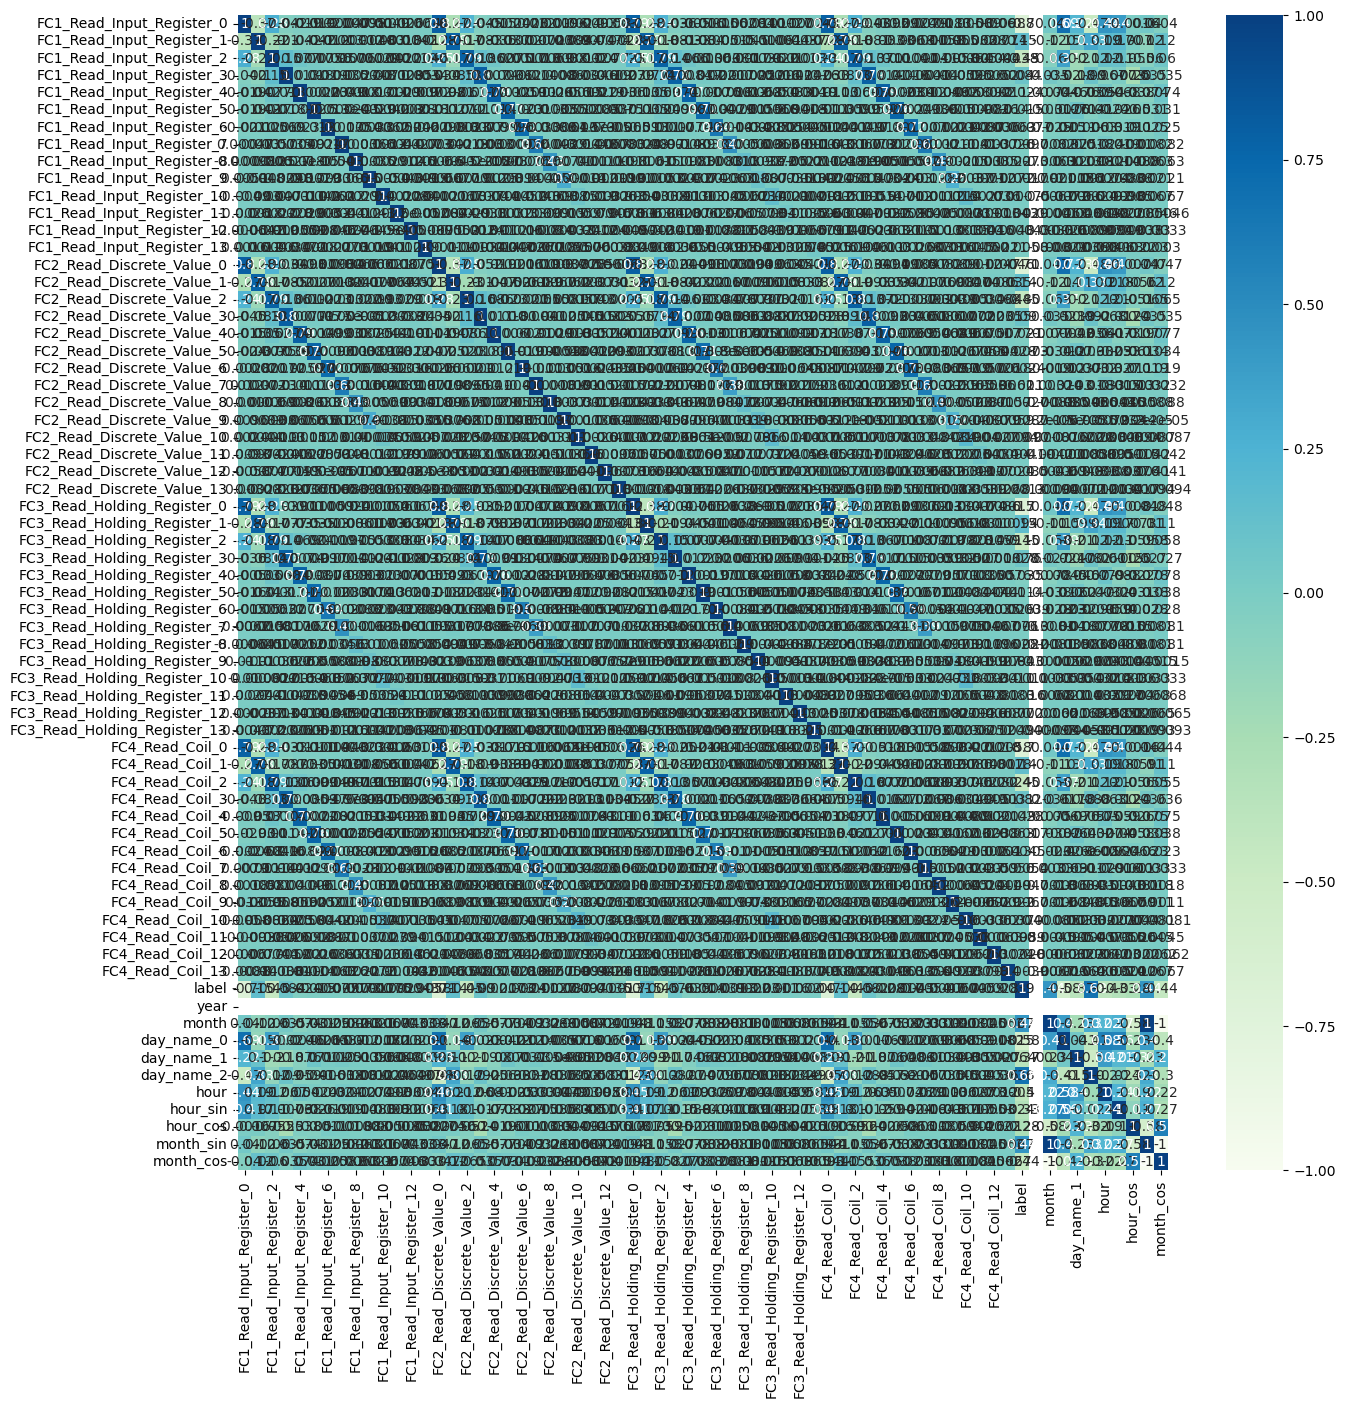

In [ ]:
# multivariate analysis
plt.figure(1, figsize = (15,15))
correlation = df.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)


In [ ]:
df = df[['FC1_Read_Input_Register_0',
 'FC1_Read_Input_Register_1',
 'FC1_Read_Input_Register_2',
 'FC1_Read_Input_Register_3',
 'FC1_Read_Input_Register_4',
 'FC1_Read_Input_Register_5',
 'FC1_Read_Input_Register_6',
 'FC1_Read_Input_Register_7',
 'FC1_Read_Input_Register_8',
 'FC1_Read_Input_Register_9',
 'FC1_Read_Input_Register_10',
 'FC1_Read_Input_Register_11',
 'FC1_Read_Input_Register_12',
 'FC1_Read_Input_Register_13',
 'FC2_Read_Discrete_Value_0',
 'FC2_Read_Discrete_Value_1',
 'FC2_Read_Discrete_Value_2',
 'FC2_Read_Discrete_Value_3',
 'FC2_Read_Discrete_Value_4',
 'FC2_Read_Discrete_Value_5',
 'FC2_Read_Discrete_Value_6',
 'FC2_Read_Discrete_Value_7',
 'FC2_Read_Discrete_Value_8',
 'FC2_Read_Discrete_Value_9',
 'FC2_Read_Discrete_Value_10',
 'FC2_Read_Discrete_Value_11',
 'FC2_Read_Discrete_Value_12',
 'FC2_Read_Discrete_Value_13',
 'FC3_Read_Holding_Register_0',
 'FC3_Read_Holding_Register_1',
 'FC3_Read_Holding_Register_2',
 'FC3_Read_Holding_Register_3',
 'FC3_Read_Holding_Register_4',
 'FC3_Read_Holding_Register_5',
 'FC3_Read_Holding_Register_6',
 'FC3_Read_Holding_Register_7',
 'FC3_Read_Holding_Register_8',
 'FC3_Read_Holding_Register_9',
 'FC3_Read_Holding_Register_10',
 'FC3_Read_Holding_Register_11',
 'FC3_Read_Holding_Register_12',
 'FC3_Read_Holding_Register_13',
 'FC4_Read_Coil_0',
 'FC4_Read_Coil_1',
 'FC4_Read_Coil_2',
 'FC4_Read_Coil_3',
 'FC4_Read_Coil_4',
 'FC4_Read_Coil_5',
 'FC4_Read_Coil_6',
 'FC4_Read_Coil_7',
 'FC4_Read_Coil_8',
 'FC4_Read_Coil_9',
 'FC4_Read_Coil_10',
 'FC4_Read_Coil_11',
 'FC4_Read_Coil_12',
 'FC4_Read_Coil_13',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos',
  'day_name_0',
 'day_name_1',
 'day_name_2',
'label']]

In [ ]:
df

,FC1_Read_Input_Register_0,FC1_Read_Input_Register_1,FC1_Read_Input_Register_2,FC1_Read_Input_Register_3,FC1_Read_Input_Register_4,FC1_Read_Input_Register_5,FC1_Read_Input_Register_6,FC1_Read_Input_Register_7,FC1_Read_Input_Register_8,FC1_Read_Input_Register_9,...,FC4_Read_Coil_12,FC4_Read_Coil_13,hour_sin,hour_cos,month_sin,month_cos,day_name_0,day_name_1,day_name_2,label
0,0,0,0,0,0,0,0,0,0,0,...,0,1,-0.866025,-5.000000e-01,1.0,6.123234e-17,0,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,-0.866025,-5.000000e-01,1.0,6.123234e-17,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,1,-0.866025,-5.000000e-01,1.0,6.123234e-17,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,-0.866025,-5.000000e-01,1.0,6.123234e-17,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,...,1,0,-0.866025,-5.000000e-01,1.0,6.123234e-17,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51101,1,1,0,0,0,0,1,0,1,1,...,1,0,-1.000000,-4.286264e-16,1.0,6.123234e-17,1,1,0,0
51102,1,1,0,0,0,0,1,0,1,1,...,1,0,-1.000000,-4.286264e-16,1.0,6.123234e-17,1,1,0,0
51103,1,1,0,0,0,0,1,0,1,1,...,1,1,-1.000000,-4.286264e-16,1.0,6.123234e-17,1,1,0,0
51104,1,1,0,0,0,0,1,0,1,1,...,1,1,-1.000000,-4.286264e-16,1.0,6.123234e-17,1,1,0,0


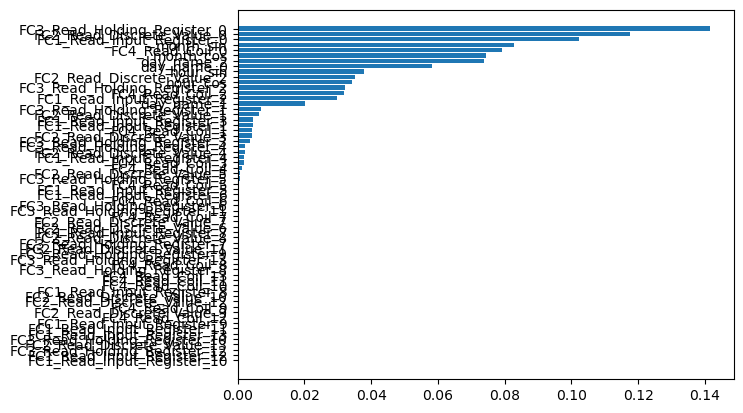

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

X = df.iloc[:,:-1]
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import datasets


sfm = SelectFromModel(rf, threshold=0.05)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5243
           1       1.00      1.00      1.00      4166

    accuracy                           1.00      9409
   macro avg       1.00      1.00      1.00      9409
weighted avg       1.00      1.00      1.00      9409

